## Linear Regression in plain Python

In linear regression we want to model the relationship between a **scalar dependent variable** $y$ and one or more **independent (predictor) variables** $\boldsymbol{x}$.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^i = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a scalar target variable

The linear regression model can be interpreted as a very **simple neural network:**
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses the identity function as its activation function

A linear regression model can be trained using either  
a) gradient descent or  
b) the normal equation (closed-form solution): $\boldsymbol{w} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}$ 

where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples.  
The normal equation requires computing the inverse of $\boldsymbol{X}^T \boldsymbol{X}$. The computational complexity of this operation lies between $O(n_{features}^{2.4}$) and $O(n_{features}^3$) (depending on the implementation).
Therefore, if the number of features in the training set is large, the normal equation will get very slow. 

* * *
The training procedure of a linear regression model has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step 0: ** 

Initialize the weight vector and bias with zeros (or small random values)

**OR**

Compute the parameters directly using the normal equation
* * *

**Step 1: ** (Only needed when training with gradient descent)

Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\boldsymbol{\hat{y}} = \boldsymbol{X} \cdot \boldsymbol{w} + b $

where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2: ** (Only needed when training with gradient descent)

Compute the cost (mean squared error) over the training set:

$J(\boldsymbol{w},b) = \frac{1}{m} \sum_{i=1}^m \Big(\hat{y}^{(i)} - y^{(i)} \Big)^2$
* * *

**Step 3: **  (Only needed when training with gradient descent)

Compute the partial derivatives of the cost function with respect to each parameter:

$ \frac{\partial J}{\partial w_j} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}_j$

$ \frac{\partial J}{\partial b} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big)$


The gradient containing all partial derivatives can then be computed as follows: 

$\nabla_{\boldsymbol{w}} J = \frac{2}{m} \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$

$\nabla_{\boldsymbol{b}} J = \frac{2}{m} \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$
* * *

**Step 4: ** (Only needed when training with gradient descent)

Update the weight vector and bias:

$\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w J$  

$b = b - \eta \, \nabla_b J$  


where $\eta$ is the learning rate.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

## Dataset

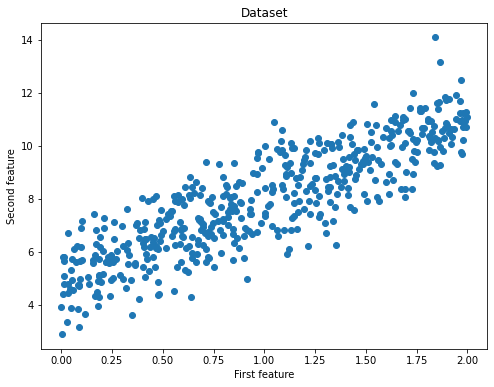

In [2]:
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('Shape X_train: {0}'.format(X_train.shape))
print('Shape y_train: {0}'.format(y_train.shape))
print('Shape X_test:  {0}'.format(X_test.shape))
print('Shape y_test:  {0}'.format(y_test.shape))

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test:  (125, 1)
Shape y_test:  (125, 1)


## Linear regression class

In [5]:
class LinearRegression:
    
    def __init__(self):
        pass

    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias

            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            if i % 100 == 0:
                print('Cost at iteration {0}: {1}'.format(i, cost))

            # Step 3: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y)) 
            
            # Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs

    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Training with gradient descent

Cost at iteration 0: 67.54898905108904
Cost at iteration 100: 2.269847765391848
Cost at iteration 200: 1.3290990786714267
Cost at iteration 300: 1.2453081238728314
Cost at iteration 400: 1.1912921964891292
Cost at iteration 500: 1.1514782267719947


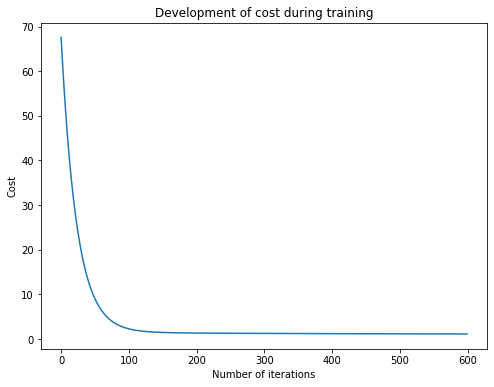

In [21]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=600)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [61]:
class MyLinearRegression():
    def __init__(self):
        pass
    
    def train_gradient_descent(self, X: np.array, y: np.array, lr: float=0.005, n_iters: int=600):
        n_samples, n_features = X.shape
        # step 0: init the weight vector and bias with zero
        self.weights = np.zeros(shape=(n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            # step 1: Compute a linear combination of the input features and weights
            y_predict = self.predict(X)
            
            # step 2: Compute cost (mean square error)
            cost = (1/n_samples)*np.sum((y_predict - y)**2)
            costs.append(cost)
            
            if i % 50 == 0:
                print("cost at iteration: {}, {}".format(i, cost))
            
            # step 3: Compute the gradients
            dJ_dw = (2/n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2/n_samples) * np.sum(y_predict - y)
            
            assert(dJ_dw.shape == self.weights.shape)
            
            # step 4: update the weight vector and bias
            self.weights = self.weights - lr * dJ_dw
            self.bias = self.bias - lr * dJ_db
        return self.weights, self.bias, costs
    
    def train_stocashtic_gradient_descent(self, X: np.array, y: np.array, lr: float=0.005, n_iters: int=600):
        n_samples, n_features = X.shape
        # step 0: init the weight vector and bias with zero
        self.weights = np.zeros(shape=(n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            cost = 0.0
            for j in range(n_samples):
                rand_idx = np.random.randint(0, n_samples)
                X_idx = X[rand_idx, :]
                y_idx = y[rand_idx, :]
#                 print("X_idx shape: {}, y_idx shape: {}".format(X_idx.shape, y_idx.shape))
                # step 1: Compute a linear combination of the input features and weights
                y_predict = self.predict(X_idx)

                # step 2: Compute cost (mean square error)
                cost += (1/n_samples)*np.sum((y_predict - y_idx)**2)

                # step 3: Compute the gradients
                dJ_dw = (2/n_samples) * np.dot(X_idx.T, (y_predict - y_idx))
                dJ_db = (2/n_samples) * np.sum(y_predict - y_idx)

#                 assert(dJ_dw.shape == self.weights.shape)

                # step 4: update the weight vector and bias
                self.weights = self.weights - lr * dJ_dw
                self.bias = self.bias - lr * dJ_db
            costs.append(cost)
            if i % 50 == 0:
                print("cost at iteration: {}, {}".format(i, cost))
        return self.weights, self.bias, costs
    
    
    def train_minibatch_gradient_descent(self, X: np.array, y: np.array, 
                                         lr: float=0.005, n_iters: int=600, batch_size: int=20):
        n_samples, n_features = X.shape
        # step 0: init the weight vector and bias with zero
        self.weights = np.zeros(shape=(n_features, 1))
        self.bias = 0
        costs = []
        n_batches = int(n_samples/batch_size)
        print("n_samples: {}, n_features: {}, n_batches: {}".format(n_samples, n_features, n_batches))
        
        for i in range(n_iters):
            cost = 0.0
            indices = np.random.permutation(n_samples)
            X = X[indices]
            
            for j in range(0, n_samples, batch_size):
                X_j = X[j:j+batch_size]
                y_j = y[j:j+batch_size]
#                 print("X_j shape: {}, y_j shape: {}".format(X_j.shape, y_j.shape))
                
                # step 1: Compute a linear combination of the input features and weights
                y_predict = self.predict(X_j)

                # step 2: Compute cost (mean square error)
                cost += (1/n_samples)*np.sum((y_predict - y_j)**2)

                # step 3: Compute the gradients
                dJ_dw = (2/n_samples) * np.dot(X_j.T, (y_predict - y_j))
                dJ_db = (2/n_samples) * np.sum(y_predict - y_j)

#                 assert(dJ_dw.shape == self.weights.shape)

                # step 4: update the weight vector and bias
                self.weights = self.weights - lr * dJ_dw
                self.bias = self.bias - lr * dJ_db
            
            costs.append(cost)
            if i % 50 == 0:
                print("cost at iteration: {}, {}".format(i, cost))
        return self.weights, self.bias, costs
        
    def predict(self, X: np.array):
        """ Predict linear regression output for given input X """
        return np.dot(X, self.weights) + self.bias

n_samples: 375, n_features: 1, n_batches: 37
cost at iteration: 0, 64.11557861077641
cost at iteration: 50, 8.393772272278841
cost at iteration: 100, 6.910370002016538
cost at iteration: 150, 6.464188829297803
cost at iteration: 200, 5.6806326281501685
cost at iteration: 250, 5.407960905743512
cost at iteration: 300, 4.699204228898676
cost at iteration: 350, 4.510021976105144
cost at iteration: 400, 4.315541758967377
cost at iteration: 450, 4.299318605750947
cost at iteration: 500, 4.209793488390899
cost at iteration: 550, 4.275699406821271


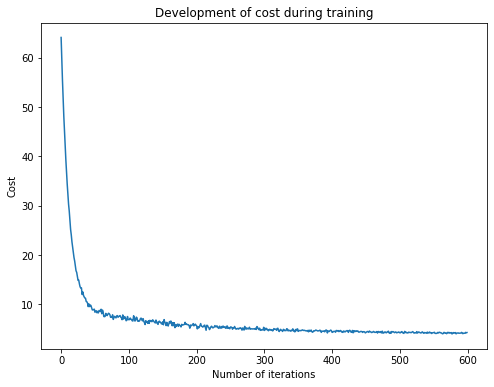

w_trained: [[0.6325138]], b_trained: 7.172398854967627


In [62]:
regressor = MyLinearRegression()
# w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, lr=0.005, n_iters=600)
# w_trained, b_trained, costs = regressor.train_stocashtic_gradient_descent(X_train, y_train, lr=0.01, n_iters=600)
w_trained, b_trained, costs = regressor.train_minibatch_gradient_descent(X_train, y_train, lr=0.01, n_iters=600, batch_size=10)


fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()
print("w_trained: {}, b_trained: {}".format(w_trained, b_trained))

## Testing (gradient descent model)

In [33]:
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print("Error on training set: {0}".format(np.round(error_train, 4)))
print("Error on test set: {0}".format(np.round(error_test)))

Error on training set: 1.0348
Error on test set: 1.0


## Training with normal equation

In [17]:
# To compute the parameters using the normal equation, we add a bias value of 1 to each input example
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained = reg_normal.train_normal_equation(X_b_train, y_train)

## Testing (normal equation model)

In [22]:
y_p_train = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print("Error on training set: {0}".format(np.round(error_train, 4)))
print("Error on test set: {0}".format(np.round(error_test, 4)))

Error on training set: 1.0228
Error on test set: 1.0432


## Visualize test predictions

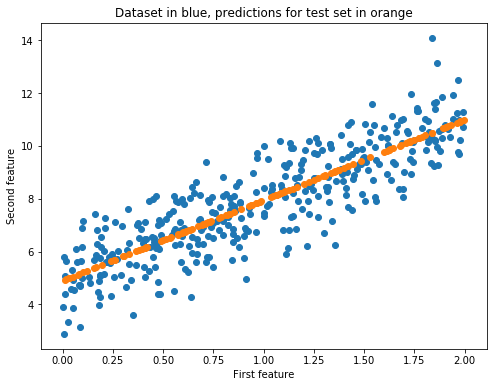

In [13]:
# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()